In [3]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegressionCV
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler
from sklearn.metrics import auc

In [4]:
df = pd.read_csv('../data/merged_data.csv')

In [5]:
df.head()

,customer_id,credit_score,num_credit_accounts,oldest_credit_line_age,oldest_account_age_months,total_credit_limit,num_delinquencies_2yrs,num_inquiries_6mo,recent_inquiry_count,num_public_records,...,account_open_year,preferred_contact,referral_code,account_status_code,random_noise_1,num_login_sessions,num_customer_service_calls,has_mobile_app,paperless_billing,default
0,10000,696,14,22.8,273.6,169100.0,0.0,2,2,1,...,2013,Mail,REF0000,ACT-2,1.137099,13,2,1,1,0
1,10001,659,13,3.5,42.0,78200.0,0.0,6,6,0,...,2015,Phone,REF0000,ACT-3,-0.164932,6,1,1,1,1
2,10002,662,3,0.0,0.0,41400.0,0.0,2,2,0,...,2020,Phone,REF0000,ACT-3,0.526700,1,2,1,0,0
3,10003,676,8,9.0,108.0,60000.0,0.0,1,1,0,...,2010,Email,REF0000,A01,-0.709779,4,1,1,1,0
4,10004,678,7,8.0,96.0,49700.0,0.0,1,1,0,...,2020,Mail,REF0000,ACT-3,-0.603132,6,2,1,0,0


In [6]:
df['employment_type'].replace({'Full Time': 'Full-time', 'FULL_TIME': 'Full-time', 'Fulltime': 'Full-time', 'FT': 'Full-time',
                                   'SELF_EMPLOYED': 'Self-employed', 'Self Emp': 'Self-employed', 'Self Employed': 'Self-employed',
                                   'PART_TIME': 'Part-time', 'PT': 'Part-time', 'Part Time': 'Part-time',
                                   'Contractor': 'Contract', 'CONTRACT': 'Contract'}, inplace=True)

df['loan_type'].replace({'Personal Loan': 'Personal', 'personal': 'Personal', 'PERSONAL': 'Personal',
                             'MORTGAGE': 'Mortgage', 'mortgage': 'Mortgage',
                             'CreditCard': 'Credit Card', 'credit card': 'Credit Card', 'CC': 'Credit Card'}, inplace=True)

/var/folders/sk/0xv6j3k50bdcv_wj6kkfqvk40000gn/T/ipykernel_53207/299961621.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['employment_type'].replace({'Full Time': 'Full-time', 'FULL_TIME': 'Full-time', 'Fulltime': 'Full-time', 'FT': 'Full-time',
/var/folders/sk/0xv6j3k50bdcv_wj6kkfqvk40000gn/T/ipykernel_53207/299961621.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will ne

In [7]:
columns_to_fix = ['loan_amount', 'monthly_income', 'existing_monthly_debt', 'monthly_payment', 
                    'revolving_balance', 'credit_usage_amount', 'available_credit', 'total_debt_amount',
                    'monthly_free_cash_flow', 'annual_income', 'total_monthly_debt_payment']

for col in columns_to_fix:
    # Remove $ sign and commas, then convert to float
    df[col] = df[col].astype(str).str.replace(r"[$,]", "", regex=True)
    df[col] = pd.to_numeric(df[col], errors='coerce')

In [8]:
df.drop(columns=['customer_id', 'application_id', 'random_noise_1', 'referral_code', 'housing_price_index',
                 'annual_income', 'annual_debt_payment', 'debt_to_income_ratio', 'revolving_balance',
                 'oldest_account_age_months', 'num_inquiries_6mo', 'loan_amount', 'payment_to_income_ratio',
                 'monthly_income', 'available_credit', 'previous_zip_code'], inplace=True)

In [9]:
df

,credit_score,num_credit_accounts,oldest_credit_line_age,total_credit_limit,num_delinquencies_2yrs,recent_inquiry_count,num_public_records,num_collections,account_diversity_index,state,...,application_hour,application_day_of_week,account_open_year,preferred_contact,account_status_code,num_login_sessions,num_customer_service_calls,has_mobile_app,paperless_billing,default
0,696,14,22.8,169100.0,0.0,2,1,0,0.499,OH,...,5,6,2013,Mail,ACT-2,13,2,1,1,0
1,659,13,3.5,78200.0,0.0,6,0,0,0.298,PA,...,4,2,2015,Phone,ACT-3,6,1,1,1,1
2,662,3,0.0,41400.0,0.0,2,0,0,0.174,VA,...,10,3,2020,Phone,ACT-3,1,2,1,0,0
3,676,8,9.0,60000.0,0.0,1,0,0,0.263,CA,...,7,5,2010,Email,A01,4,1,1,1,0
4,678,7,8.0,49700.0,0.0,1,0,0,0.298,WA,...,1,2,2020,Mail,ACT-3,6,2,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89994,817,10,8.2,135600.0,0.0,1,0,0,0.285,CA,...,13,5,2016,Email,A01,10,3,0,1,0
89995,745,9,8.8,44600.0,0.0,1,0,0,0.353,IL,...,13,5,2014,Mail,ACTIVE,12,1,1,0,0
89996,607,11,1.0,18300.0,0.0,2,1,0,0.238,CA,...,7,5,2010,Mail,A01,4,2,1,1,1
89997,678,10,3.0,54300.0,0.0,3,0,0,0.227,GA,...,8,3,2021,Email,ACT-1,5,2,0,0,0


In [10]:
df.loan_term.value_counts()

loan_term
360    26662
0      22338
36     12810
48     10836
60      5414
24      5377
180     4767
12      1795
Name: count, dtype: int64

In [11]:
numerical_features = df.select_dtypes(include=np.number).columns.tolist()

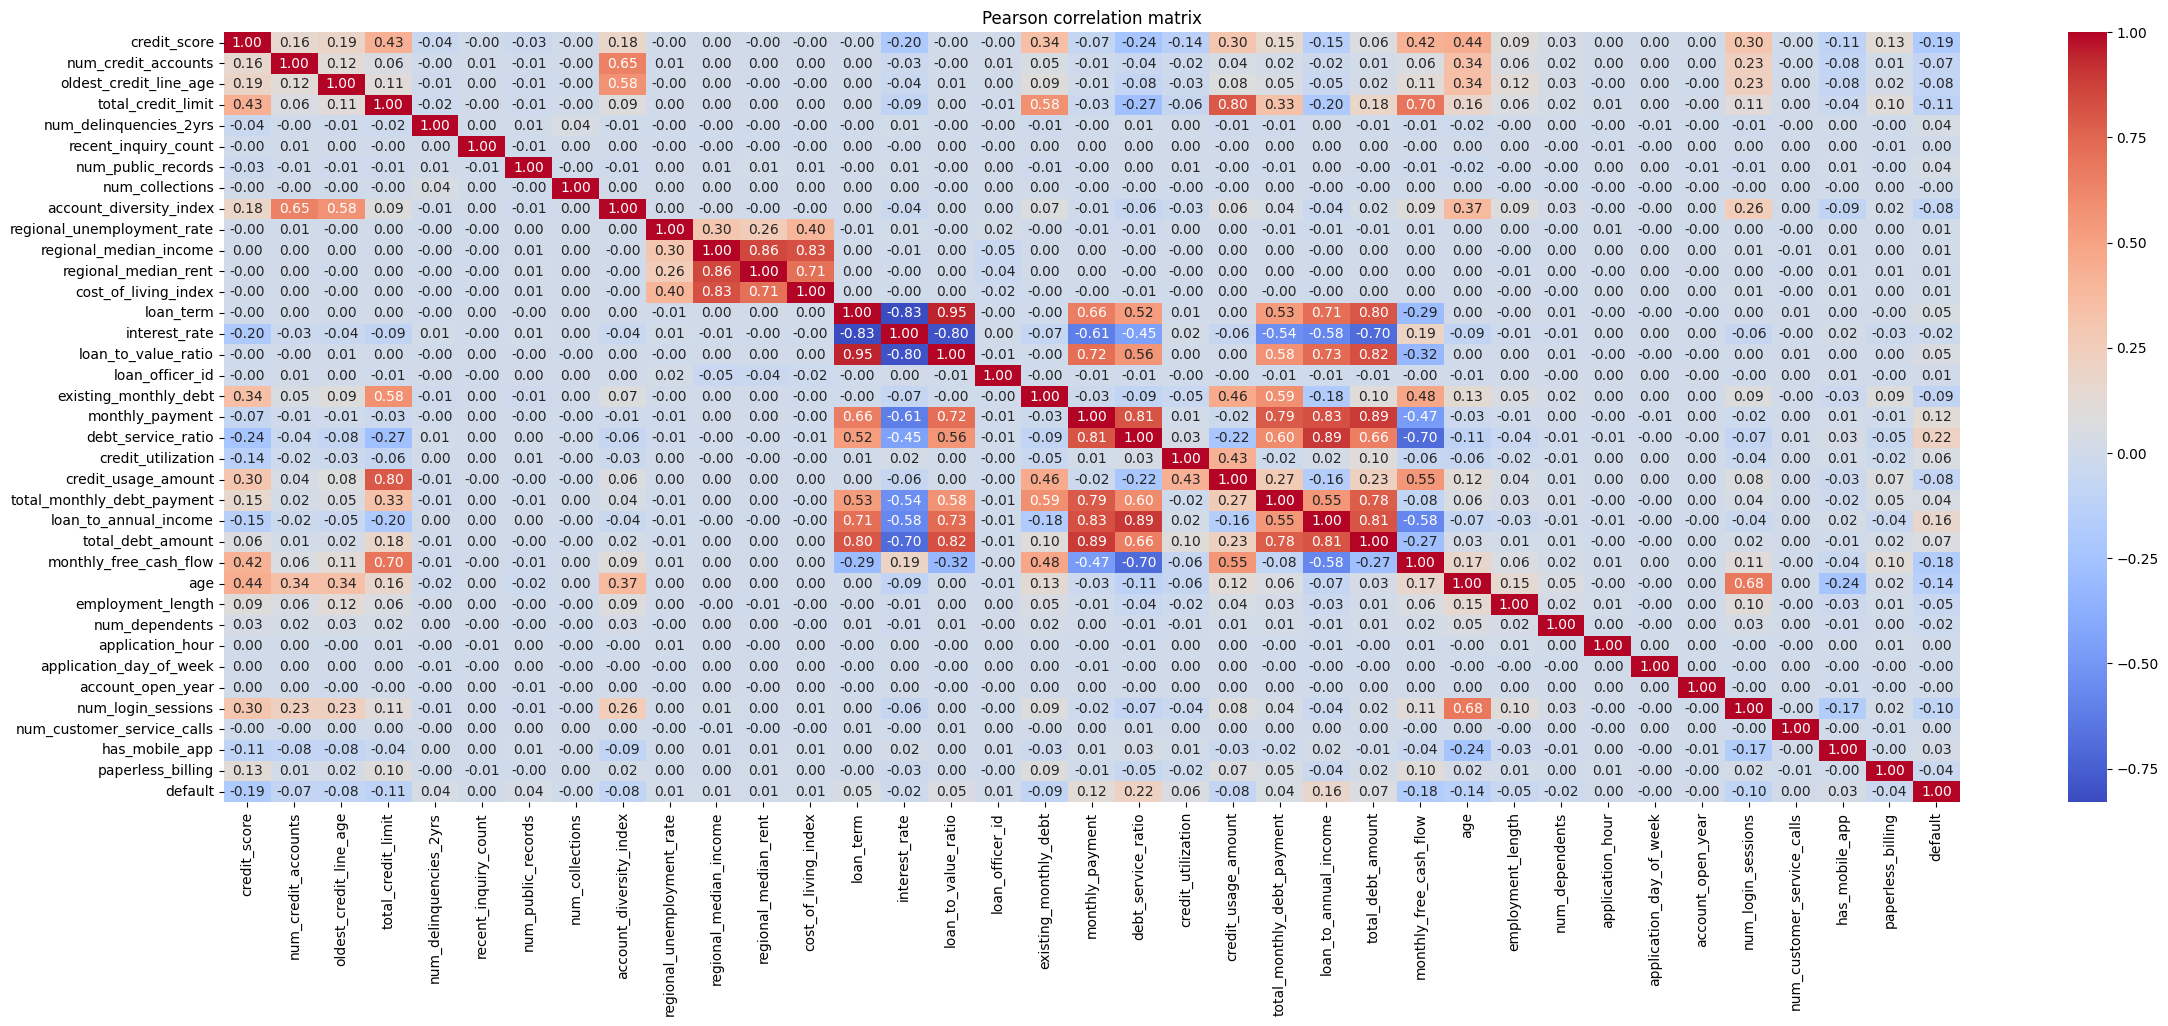

In [12]:
plt.figure(figsize=(28, 10))
sns.heatmap(df[numerical_features].corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Pearson correlation matrix')
plt.show()

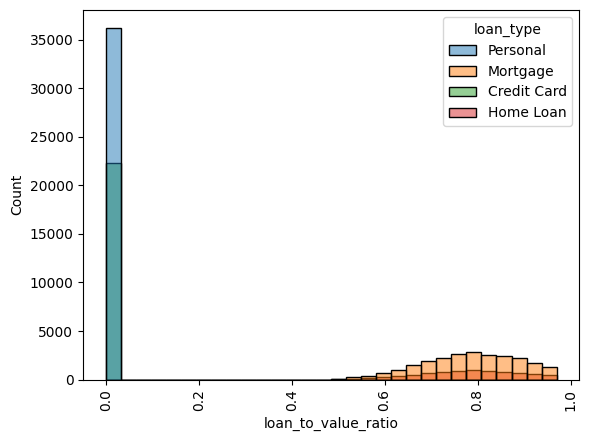

In [13]:
sns.histplot(data=df, x='loan_to_value_ratio', bins=30, hue='loan_type')
plt.xticks(rotation=90)
plt.show()

In [14]:
df[df['loan_to_value_ratio']==0]

,credit_score,num_credit_accounts,oldest_credit_line_age,total_credit_limit,num_delinquencies_2yrs,recent_inquiry_count,num_public_records,num_collections,account_diversity_index,state,...,application_hour,application_day_of_week,account_open_year,preferred_contact,account_status_code,num_login_sessions,num_customer_service_calls,has_mobile_app,paperless_billing,default
0,696,14,22.8,169100.0,0.0,2,1,0,0.499,OH,...,5,6,2013,Mail,ACT-2,13,2,1,1,0
2,662,3,0.0,41400.0,0.0,2,0,0,0.174,VA,...,10,3,2020,Phone,ACT-3,1,2,1,0,0
3,676,8,9.0,60000.0,0.0,1,0,0,0.263,CA,...,7,5,2010,Email,A01,4,1,1,1,0
4,678,7,8.0,49700.0,0.0,1,0,0,0.298,WA,...,1,2,2020,Mail,ACT-3,6,2,1,0,0
5,704,7,4.0,61700.0,0.0,4,0,0,0.298,WA,...,9,3,2017,Phone,ACT-1,5,3,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89993,795,7,8.5,117600.0,0.0,0,0,0,0.254,MA,...,2,6,2014,Mail,ACT-2,19,3,1,1,0
89994,817,10,8.2,135600.0,0.0,1,0,0,0.285,CA,...,13,5,2016,Email,A01,10,3,0,1,0
89995,745,9,8.8,44600.0,0.0,1,0,0,0.353,IL,...,13,5,2014,Mail,ACTIVE,12,1,1,0,0
89996,607,11,1.0,18300.0,0.0,2,1,0,0.238,CA,...,7,5,2010,Mail,A01,4,2,1,1,1


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89999 entries, 0 to 89998
Data columns (total 47 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   credit_score                89999 non-null  int64  
 1   num_credit_accounts         89999 non-null  int64  
 2   oldest_credit_line_age      89999 non-null  float64
 3   total_credit_limit          89999 non-null  float64
 4   num_delinquencies_2yrs      89167 non-null  float64
 5   recent_inquiry_count        89999 non-null  int64  
 6   num_public_records          89999 non-null  int64  
 7   num_collections             89999 non-null  int64  
 8   account_diversity_index     89999 non-null  float64
 9   state                       89999 non-null  object 
 10  regional_unemployment_rate  89999 non-null  float64
 11  regional_median_income      89999 non-null  int64  
 12  regional_median_rent        89999 non-null  float64
 13  cost_of_living_index        899

In [16]:
df.loan_purpose.value_counts(normalize=True)

loan_purpose
Revolving Credit      0.248203
Home Purchase         0.210413
Debt Consolidation    0.141246
Refinance             0.138802
Home Improvement      0.080979
Major Purchase        0.080068
Medical               0.060567
Other                 0.039723
Name: proportion, dtype: float64

In [17]:
for i in df['loan_purpose'].unique():
    display(i, df[df['loan_purpose']==i]['default'].value_counts(normalize=True))

'Debt Consolidation'

default
0    0.941866
1    0.058134
Name: proportion, dtype: float64

'Refinance'

default
0    0.933798
1    0.066202
Name: proportion, dtype: float64

'Major Purchase'

default
0    0.955176
1    0.044824
Name: proportion, dtype: float64

'Medical'

default
0    0.952302
1    0.047698
Name: proportion, dtype: float64

'Revolving Credit'

default
0    0.969648
1    0.030352
Name: proportion, dtype: float64

'Home Improvement'

default
0    0.952799
1    0.047201
Name: proportion, dtype: float64

'Home Purchase'

default
0    0.933305
1    0.066695
Name: proportion, dtype: float64

'Other'

default
0    0.955245
1    0.044755
Name: proportion, dtype: float64

<Axes: xlabel='interest_rate', ylabel='Count'>

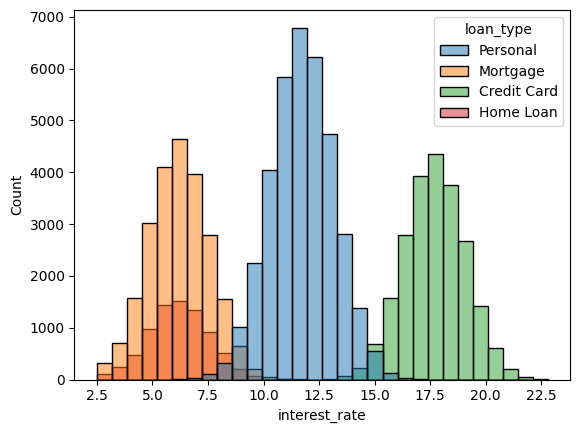

In [18]:
sns.histplot(data=df, x='interest_rate', bins=30, hue='loan_type')

In [19]:
df[df['loan_type']=='Mortgage']['default'].value_counts(normalize=True)

default
0    0.933458
1    0.066542
Name: proportion, dtype: float64

In [20]:
df[df['loan_type']=='Home Loan']['default'].value_counts(normalize=True)

default
0    0.933631
1    0.066369
Name: proportion, dtype: float64

In [21]:
df.replace({'Mortgage': 'Home Loan'}, inplace=True)

<Axes: xlabel='interest_rate', ylabel='Count'>

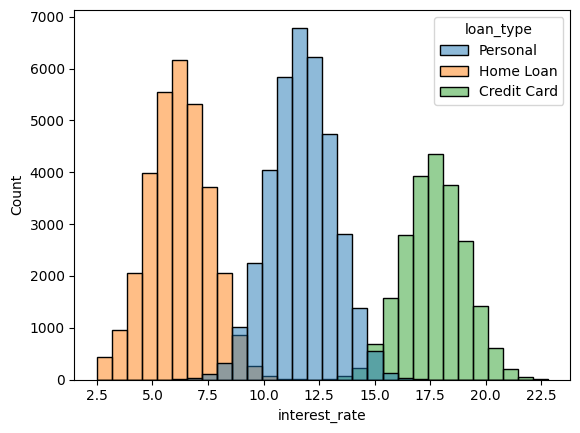

In [22]:
sns.histplot(data=df, x='interest_rate', bins=30, hue='loan_type')

In [23]:
df.drop(columns='interest_rate', inplace=True)

<Axes: xlabel='total_credit_limit', ylabel='Count'>

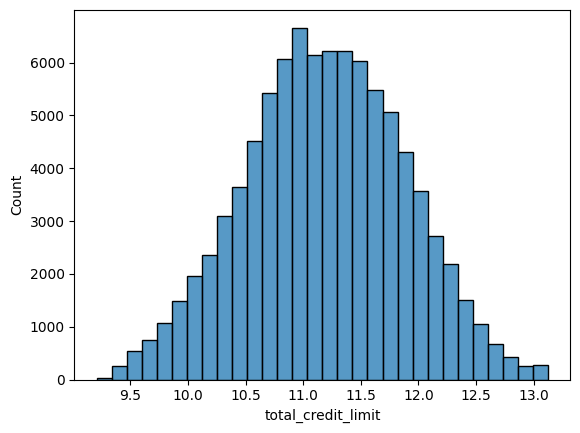

In [24]:
sns.histplot(data=df, x=np.log1p(df['total_credit_limit']), bins=30)

In [25]:
df.loan_officer_id.value_counts(True)

loan_officer_id
1047    0.024278
1000    0.024089
1004    0.023656
998     0.023467
999     0.023434
          ...   
1058    0.003189
1060    0.003133
1008    0.003056
1059    0.002989
1037    0.002589
Name: proportion, Length: 86, dtype: float64

In [ ]:
df.select_dtypes(include=object).count()

state                  89999
loan_type              89999
loan_purpose           89999
origination_channel    89999
marketing_campaign     89999
employment_type        89999
education              89999
marital_status         89999
preferred_contact      89999
account_status_code    89999
dtype: int64